import pandas as pd
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import shutil
from tqdm import tqdm

# Paths to your dataset folders and CSV file
data_dir = "/home/gcekcse/Documents/ML_Project_hk/data/train_images"
output_dir = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_images"
csv_path = "/home/gcekcse/Documents/ML_Project_hk/data/train.csv"

# Load the CSV data
data = pd.read_csv(csv_path)

# Define augmentation for fundus images
datagen = ImageDataGenerator(
    rotation_range=15,       
    horizontal_flip=True,    
    vertical_flip=True,      
    brightness_range=[0.8, 1.2],
)

# Dictionary for the augmentation targets
augmentation_targets = {
    1: 1435,  
    2: 806,   
    3: 1612,  
    4: 1510,  
}

# # Dictionary for the augmentation targets
# augmentation_targets = {
#     1: 50,  
#     2: 6,   
#     3: 2,  
#     4: 5,  
# }

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List to hold new entries for the updated CSV
new_entries = []

# Outer loop over each class with tqdm
for diagnosis_class, target_count in tqdm(augmentation_targets.items(), desc="Processing Classes"):
    # Filter the dataset for the current class
    class_data = data[data['diagnosis'] == diagnosis_class]
    
    # Copy original images to the output directory
    for _, row in class_data.iterrows():
        original_image_path = os.path.join(data_dir, row['id_code'] + '.png')
        shutil.copy(original_image_path, output_dir)
        
        # Add the original entry to the new entries list
        new_entries.append({'id_code': row['id_code'], 'diagnosis': diagnosis_class})

    image_count = len(class_data)
    images_to_generate = target_count - image_count
    
    # Loop through each image in the class and augment until we reach target count
    generated_count = 0
    for _, row in class_data.iterrows():
        image_path = os.path.join(data_dir, row['id_code'] + '.png')
        try:
            # Open image
            image = Image.open(image_path)
            image_array = np.expand_dims(np.array(image), 0)
            
            # Generate augmented images and save manually
            for batch in datagen.flow(image_array, batch_size=1):
                # Define a unique name for each augmented image
                aug_image_name = f"{row['id_code']}_aug{generated_count+1}.png"
                aug_image_path = os.path.join(output_dir, aug_image_name)
                
                # Save the generated image
                aug_image = Image.fromarray(batch[0].astype(np.uint8))
                aug_image.save(aug_image_path)
                
                # Create a new entry for the updated CSV
                new_entries.append({'id_code': f"{row['id_code']}_aug{generated_count+1}", 'diagnosis': diagnosis_class})
                
                generated_count += 1
                if generated_count >= images_to_generate:
                    break
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
        
        if generated_count >= images_to_generate:
            break

# Create a DataFrame from the new entries
new_df = pd.DataFrame(new_entries)

# Append new data to the original DataFrame
updated_data = pd.concat([data, new_df], ignore_index=True)

# Save the updated DataFrame to a new CSV file
updated_csv_path = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_train.csv"
updated_data.to_csv(updated_csv_path, index=False)

print("Augmentation completed, original images copied, and CSV updated.")


In [1]:
import pandas as pd
import os

# Paths
output_dir = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_images"
csv_path = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_train.csv"

# Load the CSV data
data = pd.read_csv(csv_path)

# Get list of all file names in the output directory (without extensions)
output_files = {os.path.splitext(file)[0] for file in os.listdir(output_dir) if file.endswith('.png')}

# Get list of all id_code entries from the CSV
csv_files = set(data['id_code'].astype(str))

# Check for missing files
missing_files = output_files - csv_files

# Print results
if missing_files:
    print("The following files are in the output directory but not in the CSV file:")
    for file in missing_files:
        print(file)
else:
    print("All files in the output directory are present in the CSV file.")


All files in the output directory are present in the CSV file.


In [2]:
import pandas as pd
import os

# Paths
output_dir = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_images"
csv_path = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_train.csv"

# Load the CSV data
data = pd.read_csv(csv_path)

# Get list of all file names in the output directory (without extensions)
output_files = {os.path.splitext(file)[0] for file in os.listdir(output_dir) if file.endswith('.png')}

# Get list of all id_code entries from the CSV
csv_files = set(data['id_code'].astype(str))

# Check for missing files
missing_files = csv_files - output_files

# Print results
if missing_files:
    print("The following id_code entries in the CSV do not have corresponding files in the output directory:")
    for file in missing_files:
        print(file)
else:
    print("All id_code entries in the CSV have corresponding files in the output directory.")


All id_code entries in the CSV have corresponding files in the output directory.


In [3]:
import pandas as pd
import os
import shutil

# Paths
data_dir = "/home/gcekcse/Documents/ML_Project_hk/data/train_images"
output_dir = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_images"
csv_path = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_train.csv"
missing_files_dir = "/home/gcekcse/Documents/ML_Project_hk/data/missing_files"

# Load the CSV data
data = pd.read_csv(csv_path)

# Get list of all file names in the output directory (without extensions)
output_files = {os.path.splitext(file)[0] for file in os.listdir(output_dir) if file.endswith('.png')}

# Get list of all id_code entries from the CSV
csv_files = set(data['id_code'].astype(str))

# Check for missing files
missing_files = csv_files - output_files

# Create directory for missing files if it doesn't exist
os.makedirs(missing_files_dir, exist_ok=True)

# Copy missing files from data_dir to missing_files_dir
if missing_files:
    print("The following id_code entries in the CSV do not have corresponding files in the output directory. Copying missing files:")
    for file in missing_files:
        source_file = os.path.join(data_dir, f"{file}.png")
        dest_file = os.path.join(missing_files_dir, f"{file}.png")
        
        # Check if the source file exists before attempting to copy
        if os.path.exists(source_file):
            shutil.copy(source_file, dest_file)
            print(f"Copied {file}.png to {missing_files_dir}")
        else:
            print(f"Source file {file}.png not found in {data_dir}")
else:
    print("All id_code entries in the CSV have corresponding files in the output directory.")


All id_code entries in the CSV have corresponding files in the output directory.


In [1]:
# Imports here
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
import torch
from torch import nn, optim
import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
from PIL import Image, ImageFile
import json
from torch.optim import lr_scheduler
import seaborn as sns
import cv2
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
from transformers import ViTModel, ViTFeatureExtractor
from imblearn.over_sampling import SMOTE

2024-11-08 12:33:03.278640: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 12:33:03.289602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 12:33:03.302452: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 12:33:03.306420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 12:33:03.316373: I tensorflow/core/platform/cpu_feature_guar

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [15]:
# Paths and dataset loading
train_csv = pd.read_csv('/home/gcekcse/Documents/ML_Project_hk/data/augmented_train.csv') #augmented_train.csv
test_csv = pd.read_csv('/home/gcekcse/Documents/ML_Project_hk/data/test.csv')
valid_csv = pd.read_csv('/home/gcekcse/Documents/ML_Project_hk/data/valid.csv')

train_path = "/home/gcekcse/Documents/ML_Project_hk/data/augmented_images/"
test_path = "/home/gcekcse/Documents/ML_Project_hk/data/test_images/"
val_path = "/home/gcekcse/Documents/ML_Project_hk/data/val_images/"

In [5]:
print(train_csv.head())
print(test_csv.head())


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
        id_code  diagnosis
0  e4dcca36ceb4          0
1  e50b0174690d          0
2  e5197d77ec68          0
3  e529c5757d64          0
4  e582e56e7942          0


Class Distribution:
diagnosis
No DR            1805
Mild             1805
Moderate         1999
Severe           1805
Proliferative    1805
Name: count, dtype: int64


/tmp/ipykernel_3042228/4144558078.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, alpha=0.8, palette='bright')


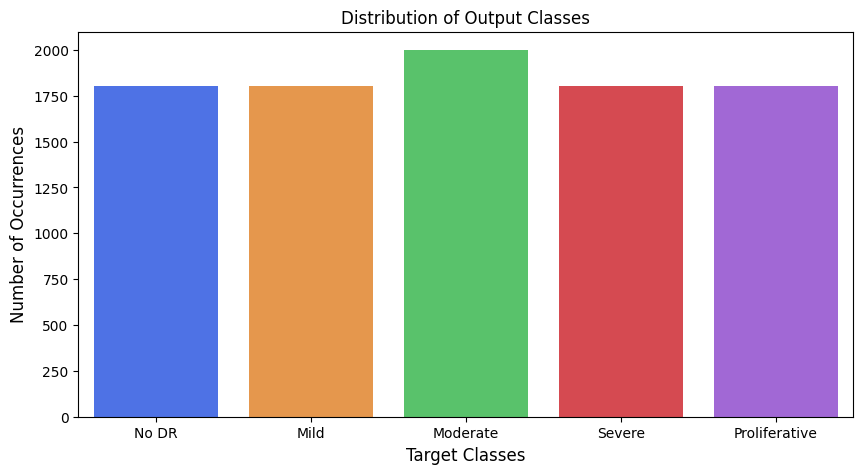

In [6]:

# Calculate counts of each diagnosis category
counts = train_csv['diagnosis'].value_counts()

# Map counts to specific class names
class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']
for i, x in enumerate(class_list):
    counts[x] = counts.pop(i)

# Print the values for each class
print("Class Distribution:")
print(counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, alpha=0.8, palette='bright')
plt.title('Distribution of Output Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target Classes', fontsize=12)
plt.show()

In [16]:
# Dataset class
class CreateDataset(Dataset):
    def __init__(self, df_data, data_dir, transform=None):
        super().__init__()
        self.df = df_data.values
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        img_name, label = self.df[index]
        img_path = os.path.join(self.data_dir, img_name)

        # Check if the file has the correct extension
        if not img_path.endswith('.png'):
            img_path += '.png'
        
        # Load the image
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found: {img_path}")
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label

# Transforms
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.4),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Validation transforms
val_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [17]:
# Datasets
train_data = CreateDataset(df_data=train_csv, data_dir=train_path, transform=train_transforms)
valid_data = CreateDataset(df_data=valid_csv, data_dir=val_path, transform=val_transforms)
test_data = CreateDataset(df_data=test_csv, data_dir=test_path, transform=test_transforms)

# Data loaders
trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
validloader = DataLoader(valid_data, batch_size=64, shuffle=False)
testloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [10]:
# Hybrid Model with ResNet152 and ViT
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        
        # ResNet152 model
        self.resnet = models.resnet152(pretrained=True)
        num_ftrs_resnet = self.resnet.fc.in_features
        self.resnet.fc = nn.Identity()  # Remove the ResNet's classifier
        
        # Vision Transformer (ViT) model
        self.vit = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
        
        # Combined classifier
        self.fc = nn.Sequential(
            nn.Linear(num_ftrs_resnet + 768, 512),  # Combining ResNet and ViT outputs
            nn.ReLU(),
            nn.Linear(512, 5),  # 5 output classes for diabetic retinopathy
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, x):
        resnet_features = self.resnet(x)  # ResNet output
        vit_features = self.vit(pixel_values=x).last_hidden_state[:, 0]  # ViT output (CLS token)
        
        combined = torch.cat((resnet_features, vit_features), dim=1)  # Concatenate ResNet and ViT features
        output = self.fc(combined)  # Classifier
        return output
    
# Initialize the model
model = HybridModel()

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the device (GPU or CPU)
model = model.to(device)

# Loss, optimizer, scheduler
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


/home/gcekcse/hkenv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gcekcse/hkenv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# Define model file name and checkpoint path
model_name = "classifier.pt"
checkpoint_path = "/home/gcekcse/Documents/ML_Project_hk/data/models/"
model_file_path = os.path.join(checkpoint_path, model_name)
checkpoint_file = os.path.join(checkpoint_path, 'checkpoint_4.pt')

# Train and test loop with checkpointing and early stopping
def train_and_test(e, patience=10):
    # Check if there's a checkpoint to load
    if os.path.exists(checkpoint_file):
        print("Loading checkpoint...")
        checkpoint = torch.load(checkpoint_file)
        start_epoch = checkpoint['epoch'] + 1
        train_losses = checkpoint['train_losses']
        test_losses = checkpoint['test_losses']
        acc = checkpoint['acc']
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        valid_loss_min = checkpoint['valid_loss_min']
    else:
        start_epoch = 0
        train_losses, test_losses, acc = [], [], []
        valid_loss_min = np.Inf

    model.train()
    print("Model Training started.....")

    epochs_no_improve = 0  # Track epochs with no improvement for early stopping
    
    for epoch in range(start_epoch, e):
        running_loss = 0
        batch = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            batch += 1
            if batch % 10 == 0:
                print(f" epoch {epoch + 1} batch {batch} completed")

        test_loss, accuracy = 0, 0
        with torch.no_grad():
            model.eval()
            for images, labels in validloader:
                images, labels = images.to(device), labels.to(device)
                logps = model(images)
                test_loss += criterion(logps, labels).item()
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss / len(trainloader))
        test_losses.append(test_loss / len(validloader))
        acc.append(accuracy / len(validloader))
        scheduler.step()

        print(f"Epoch: {epoch + 1}/{e}.. "
              f"Training Loss: {running_loss/len(trainloader):.3f}.. "
              f"Valid Loss: {test_loss/len(validloader):.3f}.. "
              f"Valid Accuracy: {accuracy/len(validloader):.3f}")

        # Save checkpoint after each epoch
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses': train_losses,
            'test_losses': test_losses,
            'acc': acc,
            'valid_loss_min': valid_loss_min
        }
        torch.save(checkpoint, checkpoint_file)

        # Check if validation loss has improved
        if test_loss / len(validloader) < valid_loss_min:
            torch.save({'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()},
                       model_file_path)
            valid_loss_min = test_loss / len(validloader)
            epochs_no_improve = 0  # Reset early stopping counter if validation loss improved
        else:
            epochs_no_improve += 1  # Increment early stopping counter

        # Early stopping check
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

    print('Training Completed Successfully!')
    return train_losses, test_losses, acc


# Start Training
train_losses, valid_losses, acc = train_and_test(50)

In [14]:
# Plotting training curves
plt.plot(train_losses, label='train_loss')
plt.plot(valid_losses, label='valid_loss')  # Directly use valid_losses
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

plt.plot(acc, label='accuracy')  # Assuming acc is also in float format
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)
plt.show()


NameError: name 'train_losses' is not defined

In [13]:
# Define class names
class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']

# Function to generate graphical confusion matrix
def generate_confusion_matrix(model, dataloader):
    y_true, y_pred = [], []
    with torch.no_grad():
        model.eval()
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            logps = model(images)
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(top_class.cpu().numpy())
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, [x[0] for x in y_pred])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_list, yticklabels=class_list)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


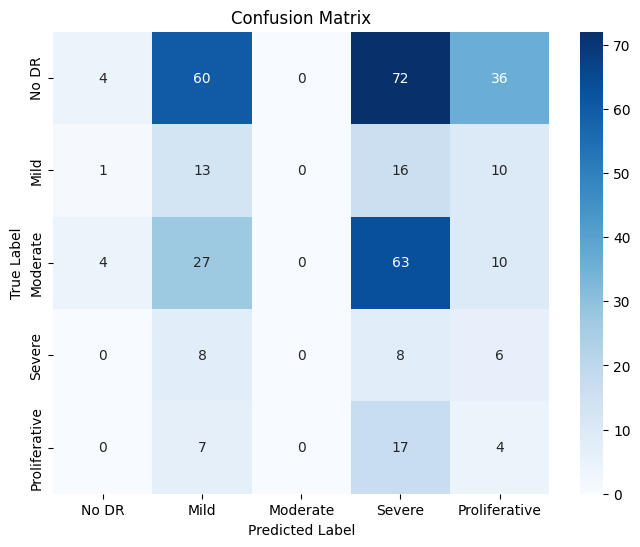

In [18]:
# Generate confusion matrix for the validation set
generate_confusion_matrix(model, validloader)

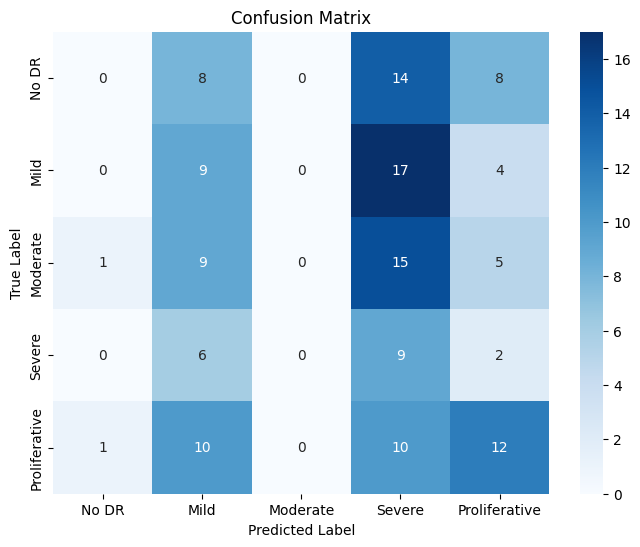

In [19]:
# Generate confusion matrix for the validation set
generate_confusion_matrix(model, testloader)

In [44]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define class names
class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']

# Function to calculate and plot performance metrics
def generate_performance_metrics(model, dataloader, device):
    y_true, y_pred = [], []
    
    # Set the model to evaluation mode
    with torch.no_grad():
        model.eval()
        for images, labels in dataloader:
            # Move data to the correct device (GPU/CPU)
            images, labels = images.to(device), labels.to(device)
            
            # Get model predictions
            logps = model(images)
            ps = torch.exp(logps)  # Convert log-probabilities to probabilities
            top_p, top_class = ps.topk(1, dim=1)  # Get the top predicted class
            
            # Extend lists with true labels and predicted labels
            y_true.extend(labels.cpu().numpy())  # True labels
            y_pred.extend(top_class.cpu().numpy().flatten())  # Flatten predictions to a 1D array
    
    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision, recall, and F1 score (weighted average)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    # Calculate F1 score for each class
    f1_per_class = f1_score(y_true, y_pred, average=None)
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-Score: {f1_weighted:.4f}\n")
    
    # Print F1 score for each class
    print("F1 Score per Class:")
    for i, f1 in enumerate(f1_per_class):
        print(f"{class_list[i]}: {f1:.4f}")
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_list, yticklabels=class_list)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



Accuracy: 0.9714
Weighted Precision: 0.9729
Weighted Recall: 0.9714
Weighted F1-Score: 0.9712

F1 Score per Class:
No DR: 0.9836
Mild: 0.9831
Moderate: 0.9677
Severe: 0.9714
Proliferative: 0.9524


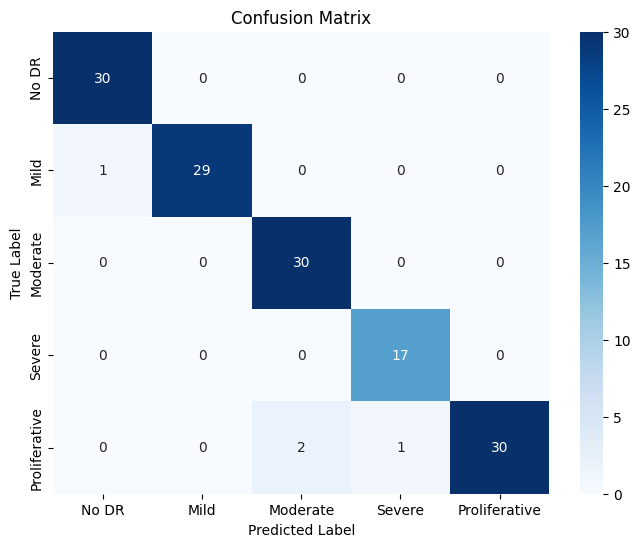

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the correct device

# Generate and plot the confusion matrix for the test set
generate_performance_metrics(model, testloader, device)

Accuracy: 0.9714
Weighted Precision: 0.9729
Weighted Recall: 0.9714
Weighted F1-Score: 0.9712

F1 Score per Class:
No DR: 0.9836
Mild: 0.9831
Moderate: 0.9677
Severe: 0.9714
Proliferative: 0.9524


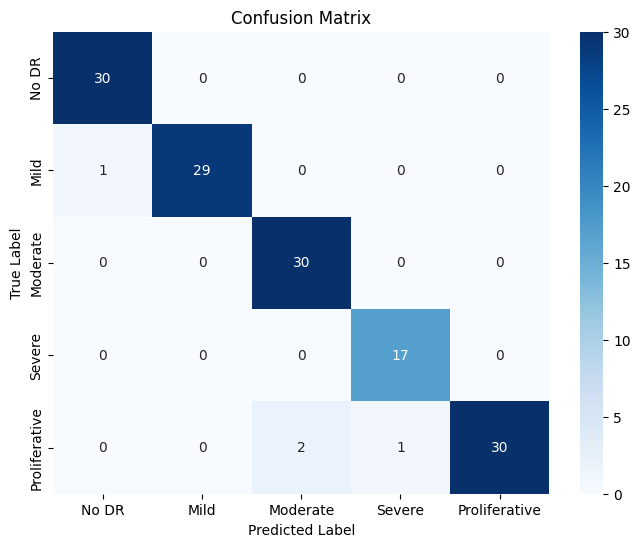

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the correct device

# Generate and plot the confusion matrix for the test set
generate_performance_metrics(model, testloader, device)

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# Assuming you already have your class labels
class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define image transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def extract_label_from_filename(filename):
    """Extract actual class label from the filename."""
    label_prefix = filename[:2]  # Extract the first two characters (e.g., "D0", "D1")
    label_mapping = {'D0': 0, 'D1': 1, 'D2': 2, 'D3': 3, 'D4': 4}
    return label_mapping.get(label_prefix, None)

def predict_single_image(image_path):
    # Extract actual label from the filename
    filename = os.path.basename(image_path)
    actual_label_idx = extract_label_from_filename(filename)
    
    # Check if actual label is found, otherwise set to "Not Provided"
    if actual_label_idx is not None:
        actual_label = class_list[actual_label_idx]
    else:
        actual_label = "Not Provided"

    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Set model to evaluation mode and make prediction
    model.eval()
    with torch.no_grad():
        logps = model(input_tensor)
        ps = torch.exp(logps)  # Convert log-probabilities to probabilities
        top_p, top_class = ps.topk(1, dim=1)  # Get the top predicted class

    # Get the predicted label
    predicted_label = class_list[top_class.item()]

    # Print and display the results
    print(f"File: {filename}")
    print(f"Predicted: {predicted_label}")
    print(f"Actual: {actual_label}")

    # Plot the image with predicted and actual labels
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=14)
    plt.axis('off')
    plt.show()

def predict_all_images_in_directory(directory_path):
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.endswith(('.png', '.jpeg', '.jpg'))]
    
    # Loop through each image file and make a prediction
    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        print("\nProcessing:", image_file)
        predict_single_image(image_path)

# Example usage: Predicting all images in the 'my_images' folder
my_images_dir = "/home/gcekcse/Documents/ML_Project_hk/data/my_images/"
predict_all_images_in_directory(my_images_dir)



Processing: D2_1.png


NameError: name 'model' is not defined

import pandas as pd
import shutil
import os

# Paths
csv_file_path = "/home/gcekcse/Documents/ML_Project_hk/data/test.csv"
test_images_dir = "/home/gcekcse/Documents/ML_Project_hk/data/test_images/"
my_images_dir = "/home/gcekcse/Documents/ML_Project_hk/data/my_images/"

# Create destination directory if it doesn't exist
os.makedirs(my_images_dir, exist_ok=True)

# Load the CSV file
try:
    df = pd.read_csv(csv_file_path)
    print("CSV file loaded successfully.")
except Exception as e:
    print(f"Failed to load CSV file: {e}")
    exit()

# Check if CSV has required columns
if 'id_code' not in df.columns or 'diagnosis' not in df.columns:
    print("CSV file does not have the required columns: 'id_code' and 'diagnosis'")
    exit()

# Initialize a dictionary to keep track of the count for each class
class_count = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

# Define how many images to copy for each class
images_per_class = 2

# Loop through the dataframe to find images for each class
for index, row in df.iterrows():
    image_id = row['id_code']
    class_label = row['diagnosis']
    
    # Validate class label
    if class_label not in class_count:
        print(f"Invalid class label found: {class_label} for image {image_id}")
        continue

    # Check if we have already copied enough images for this class
    if class_count[class_label] < images_per_class:
        # Construct source and destination file paths
        src_path = os.path.join(test_images_dir, f"{image_id}.png")
        new_filename = f"D{class_label}_{class_count[class_label] + 1}.png"
        dest_path = os.path.join(my_images_dir, new_filename)
        
        # Check if the source file exists
        if os.path.exists(src_path):
            try:
                shutil.copy(src_path, dest_path)
                print(f"Copied: {src_path} to {dest_path}")
                
                # Increment the count for this class
                class_count[class_label] += 1
            except Exception as e:
                print(f"Error copying file {src_path}: {e}")
        else:
            print(f"Source file not found: {src_path}")
        
        # Stop if we have enough images for all classes
        if all(count >= images_per_class for count in class_count.values()):
            break

print("\nCopying completed.")

# List the names of the images in the my_images folder
print("\nImages in 'my_images' folder:")
copied_images = os.listdir(my_images_dir)
if copied_images:
    for img_name in copied_images:
        print(img_name)
else:
    print("No images found in the directory.")


In [ ]:
# Load the model
model_path = "/home/gcekcse/Documents/ML_Project_hk/data/models/classifier_4.pt"
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # Set model to evaluation mode

# Generate confusion matrix for the test set
generate_confusion_matrix(model, validloader)
